#Walmart Business Case Study

**About Walmart**:

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

##**A high level overview of Walmart case study**
* Problem Description
* General Datset Inspection
* Missing Value check
* EDA
* Male & Female average purchases by CLT
* Top 5 Categories on which Men & Women spend
* Married Vs Unmarried average purchase by CLT
* Age groups Vs average purchase by CLT
* Top categories across different cities
* Top categories across different age groups.
* Recommendations Recap

## **Problem Description :**
 To analyze the customer purchase behaviour to help the business make better decisions and answer questions like do spending habits between male and female customers differ.

We have been provided with a sample dataset, we need to extrapolate it by using CLT to find inferences.

Importing the necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('/content/walmart_data.txt')

First look at the dataset

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

**Column Descriptions**

* **User_ID**:	User ID

* **Product_ID**:	Product ID

* **Gender**:	Sex of User

* **Age**:	Age in bins

* **Occupation**:	Occupation(Masked)

* **City_Category**:	Category of the City (A,B,C)

* **StayInCurrentCityYears**:	Number of years stay in current city

* **Marital_Status**:	Marital Status

* **ProductCategory**:	Product Category (Masked)

* **Purchase**:	Purchase Amount

In [ ]:
df.shape

(550068, 10)

There are 550068 rows of data and 10 columns in our dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


* We can see that there are 5 numerical data types
* If need be we can convert Marital status which is of numeric data type to categorical data type. I personally have not converted to categorical type since 1 & 0 do the job satisfactorily.

**Missing value check**

In [ ]:
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


There aren't any missing values in our datset. So we need not do any imputation.

**Unique values of categorical columns**

In [ ]:
for i in df.select_dtypes(exclude=["number"]).columns:
  print(f'{i} : {df[i].unique()}')

Product_ID : ['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Gender : ['F' 'M']
Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category : ['A' 'C' 'B']
Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0']


**Observations:**
* Product_ID column has numerous unique products
* Gender column has F & M as unique values which account for Female and Male respectively
* Age column has 8 unique attributes or bins where the age group is divided into
* City_Category column has 3 cities namely "A","B" & "C"
*Stay_In_Current_City_Years has 5 unique bins

**Unique Attributes in each column**

In [ ]:
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


We can see that this sample data has 5891 unique users and 3631 unique products.

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


**Key Observations upon looking at the above tabular column**

* The average purchase value per product is 9263$ across both male and female categories
* The lowest purchase value of the product is 12 with the highest and the median value being 23961 and 8047 dollars respectively.


##**EDA**

In [ ]:
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


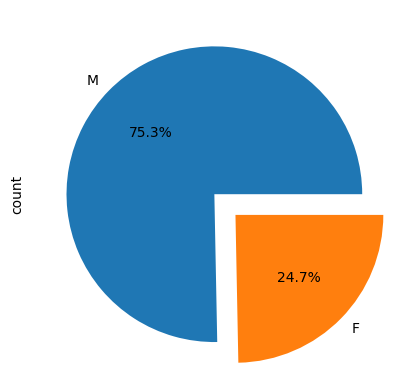

In [ ]:
df['Gender'].value_counts().plot(kind='pie',explode=[0,0.2],autopct='%1.1f%%')
plt.show()

There are 3 times more men in the sample datset than women.

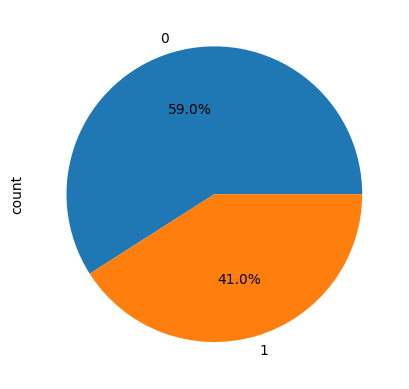

In [ ]:
df['Marital_Status'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.show()

Majority of the customers are unmaried with the ratio of married to unmarried being 41:59

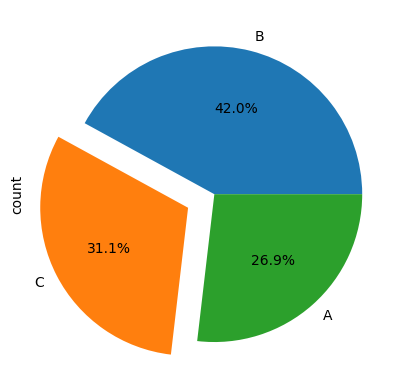

In [ ]:
df['City_Category'].value_counts().plot(kind='pie',explode=[0,0.2,0],autopct="%1.1f%%")
plt.show()

City B has the most sales which is followed by C & A

**Purchase against categorical columns**

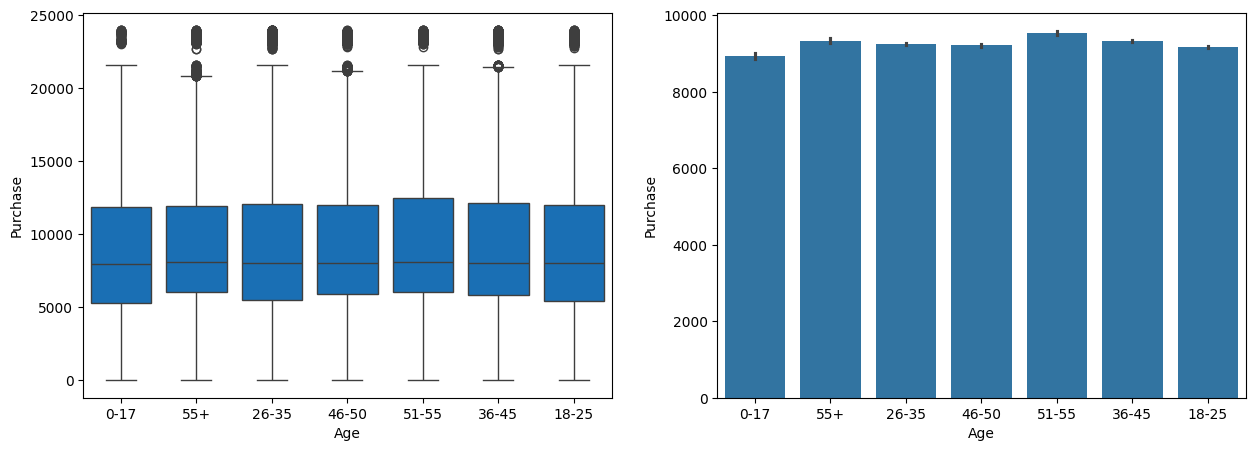

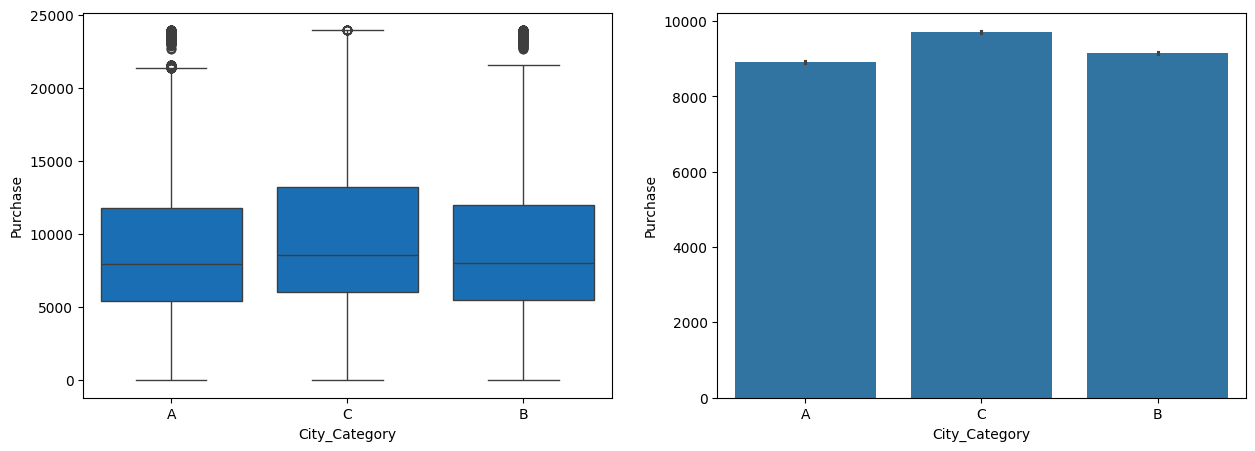

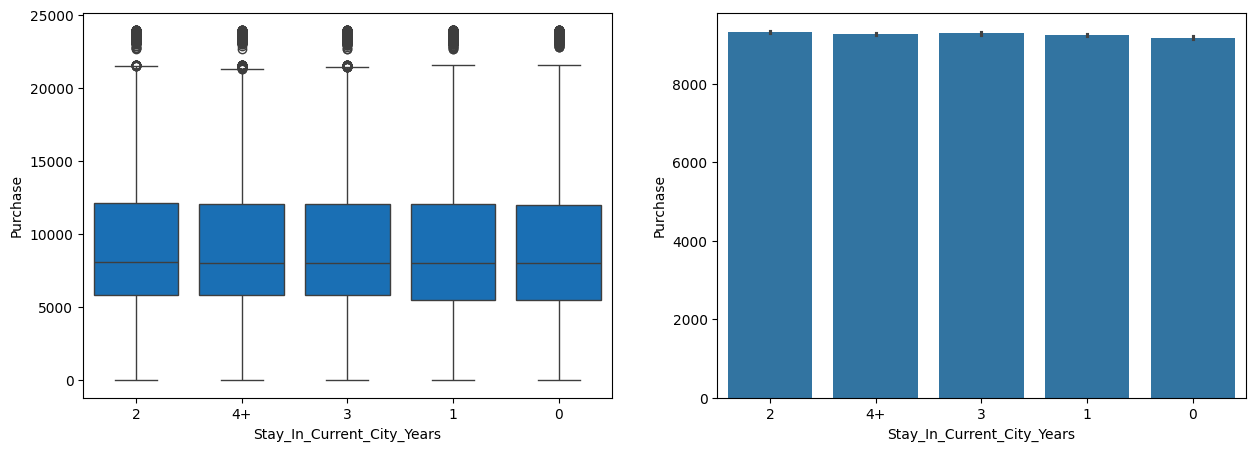

In [ ]:
for i in list(df.select_dtypes(exclude=["number"]).columns)[2:]:
  fig = plt.figure(figsize=(15,5))
  ax2 = fig.add_subplot(121)
  sns.boxplot(x = i,y='Purchase',data=df,color='#0072CE',ax=ax2)
  ax = fig.add_subplot(122)
  sns.barplot(x = i,y = 'Purchase',data=df,ax=ax)

**Observations**:

* **Age Vs Purchase:**


1.   We can see that the age group "0-17" makes the smallest purchase while the age group "51-55" makes the highest purchase
2.   There exists outliers in every age group of people, generally anyone who earns more than 22,000 across any group is treated as an outlier.



* **City Vs Purchase:**


1.   The people of city "C" do the most amount of purchase comapred to A & B
2.   There are far more outliers in cities A & B compared to C



* **Stay Years Vs Purchase:**


1.   There is absolutely no difference in the average amount spent by people who have lived in a particular city across different number of years.
2.   There exits equal number of outliers across all segments.



In [ ]:
df.groupby('Gender').describe()['Purchase']

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


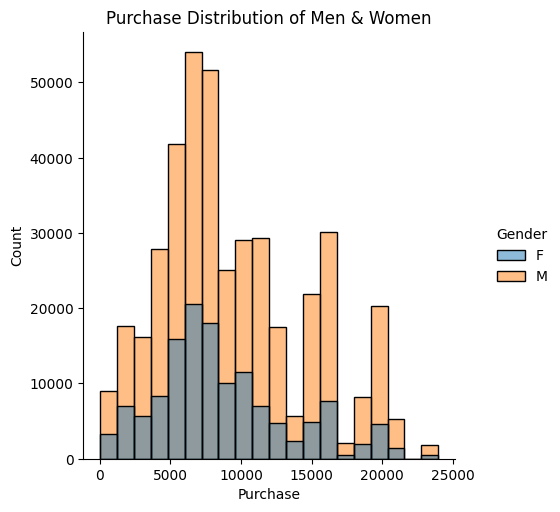

In [ ]:
sns.displot(x='Purchase',data=df,hue='Gender',bins=20)
plt.title("Purchase Distribution of Men & Women")
plt.show()

**Observation:**

The average amount of money spent on purchase by a women is 8734 as opposed to men which is 9437.

##**CLT**

**Male & Female Average Purchases by CLT**

**Taking 1000 samples to estimate the population mean**

In [ ]:
male_purchase_mean = []
female_purchase_mean = []
for i in range(1000):
  male_purchase_mean.append(df[df['Gender'] == 'M']['Purchase'].sample(1000).mean())
  female_purchase_mean.append(df[df['Gender'] == 'F']['Purchase'].sample(1000).mean())

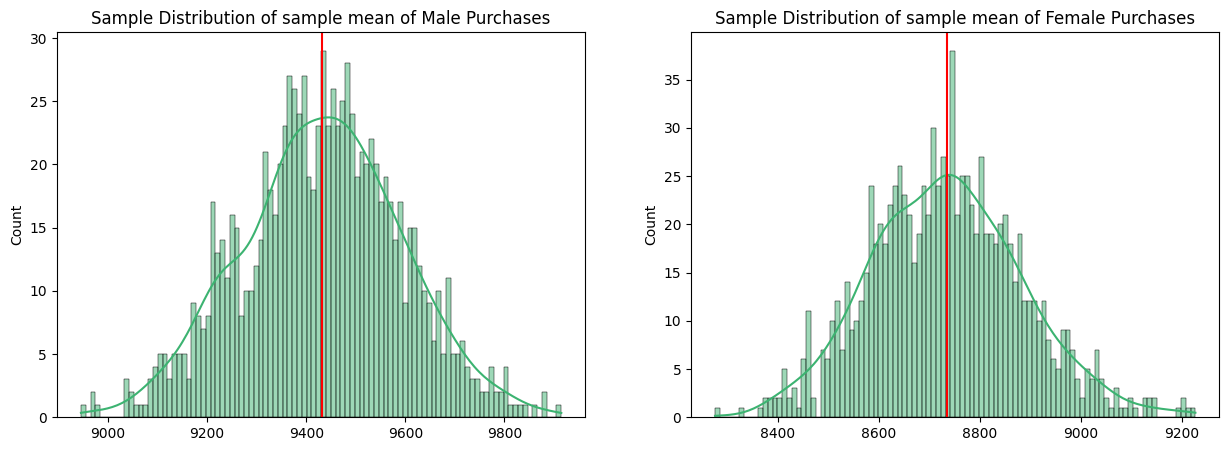

In [ ]:
fig = plt.figure(figsize=(15,5))
ax2 = fig.add_subplot(121)
sns.histplot(male_purchase_mean,bins=100,kde=True,ax=ax2,color='mediumseagreen')
ax2.axvline(pd.Series(male_purchase_mean).mean(),color = "red",linestyle="-",linewidth=1.5)
ax2.title.set_text("Sample Distribution of sample mean of Male Purchases")
ax = fig.add_subplot(122)
sns.histplot(female_purchase_mean,bins=100,kde=True,ax=ax,color='mediumseagreen')
ax.axvline(pd.Series(female_purchase_mean).mean(),color = "red",linestyle="-",linewidth=1.5)
ax.title.set_text("Sample Distribution of sample mean of Female Purchases")
plt.show()

In [ ]:
pd.Series(male_purchase_mean).mean()

9431.670514

In [ ]:
pd.Series(female_purchase_mean).mean()

8733.944801000001

**Mean of Sample Means**:
* The average mean of sampling distribution of sample mean for males is 9431
* The average mean of sampling distribution of sample mean for females is 8733

Now we shall try and estimate the interval within which the population average shall lie with 95% conidence interval

In [ ]:
lower_limit_males = pd.Series(male_purchase_mean).mean() - (pd.Series(male_purchase_mean).std()/np.sqrt(1000))*1.96
higher_limit_males = pd.Series(male_purchase_mean).mean() + (pd.Series(male_purchase_mean).std()/np.sqrt(1000))*1.96
lower_limit_females = pd.Series(female_purchase_mean).mean() - (pd.Series(female_purchase_mean).std()/np.sqrt(1000))*1.96
higher_limit_females = pd.Series(female_purchase_mean).mean() + (pd.Series(female_purchase_mean).std()/np.sqrt(1000))*1.96

In [ ]:
lower_limit_males,higher_limit_males

(9421.710027308423, 9441.631000691576)

**We can say with 95% confidence level that the average male purchase amount for the population lies between 9421 and 9441.**

In [ ]:
(pd.Series(male_purchase_mean).std()/np.sqrt(1000))

5.081880965090108

**The standard error of the male purchase mean is 5.31**

In [ ]:
lower_limit_females,higher_limit_females

(8724.641284252353, 8743.24831774765)

**We can say with 95% confidence level that the average female purchase amount for the population lies between 8724.6 and 8743.2**

In [ ]:
(pd.Series(female_purchase_mean).std()/np.sqrt(1000))

4.746692218187482

**The standard error of female purchase mean is 4.79**

<ipython-input-29-15359c5bbba6>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(male_purchase_mean,shade=True,label='Male',color='deepskyblue')
<ipython-input-29-15359c5bbba6>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(female_purchase_mean,shade=True,label='Female',color = 'orange')


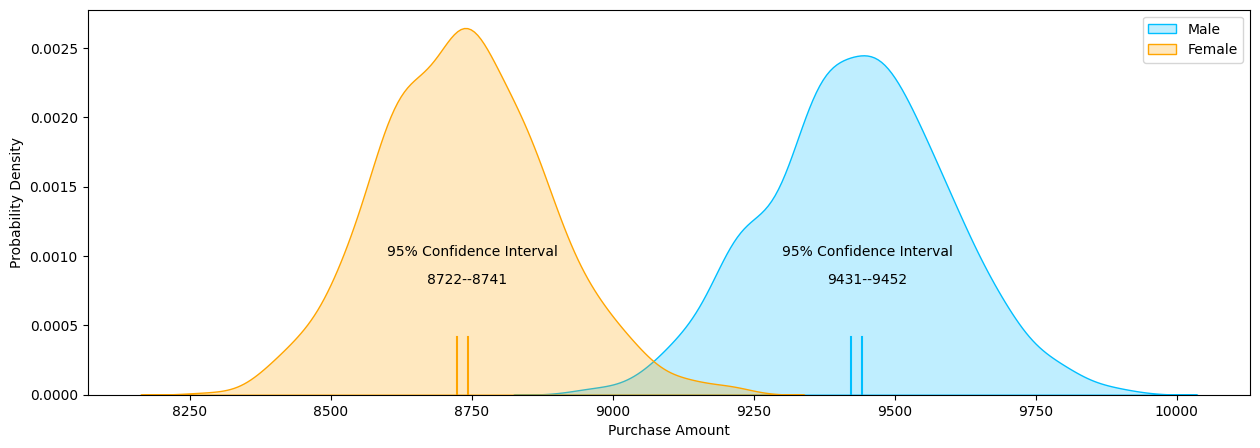

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.kdeplot(male_purchase_mean,shade=True,label='Male',color='deepskyblue')
sns.kdeplot(female_purchase_mean,shade=True,label='Female',color = 'orange')
plt.xlabel('Purchase Amount')
plt.ylabel('Probability Density')
plt.axvline(lower_limit_males, 0,0.15,color='deepskyblue')
plt.axvline(higher_limit_males, 0,0.15,color='deepskyblue')
plt.axvline(lower_limit_females, 0,0.15,color='orange')
plt.axvline(higher_limit_females, 0,0.15,color='orange')
plt.annotate("95% Confidence Interval",xy=(8600,0.0010),size=10)
plt.annotate("8722--8741",xy=(8670,0.0008),size=10)
plt.annotate("95% Confidence Interval",xy=(9300,0.0010),size=10)
plt.annotate("9431--9452",xy=(9380,0.0008),size=10)
plt.legend()
plt.show()

Now we shall repeat the excersise with 50 & 100 samples to observe the changes of the population mean.




**Sample size of 100**

In [ ]:
male_purchase_mean100 = [df[df['Gender']=='M']['Purchase'].sample(100).mean() for i in range(100)]
female_purchase_mean100 = [df[df['Gender']=='F']['Purchase'].sample(100).mean() for i in range(100)]

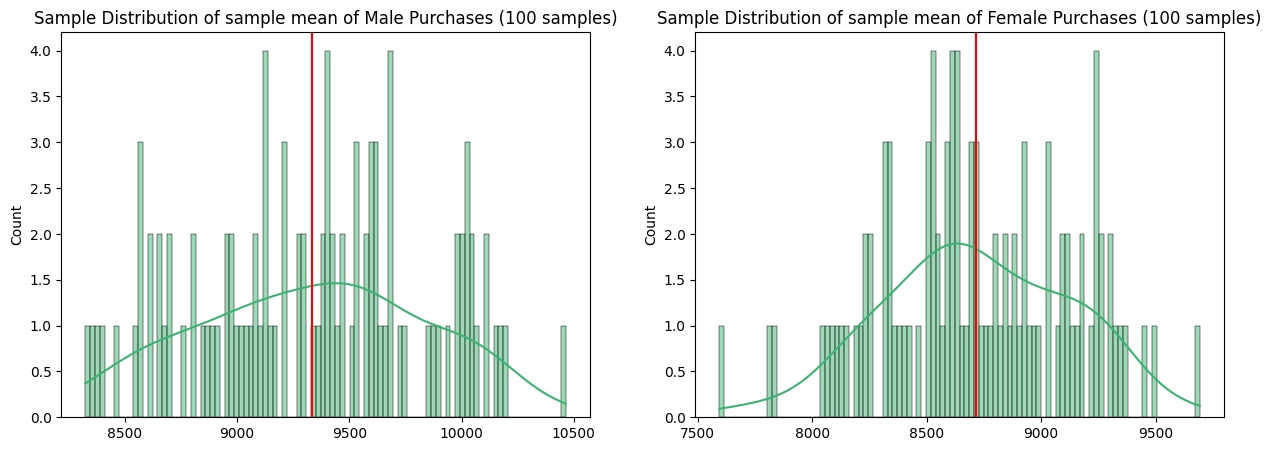

In [ ]:
fig = plt.figure(figsize=(15,5))
ax2 = fig.add_subplot(121)
sns.histplot(male_purchase_mean100,bins=100,kde=True,ax=ax2,color='mediumseagreen')
ax2.axvline(pd.Series(male_purchase_mean100).mean(),color = "red",linestyle="-",linewidth=1.5)
ax2.title.set_text("Sample Distribution of sample mean of Male Purchases (100 samples)")
ax = fig.add_subplot(122)
sns.histplot(female_purchase_mean100,bins=100,kde=True,ax=ax,color='mediumseagreen')
ax.axvline(pd.Series(female_purchase_mean100).mean(),color = "red",linestyle="-",linewidth=1.5)
ax.title.set_text("Sample Distribution of sample mean of Female Purchases (100 samples)")
plt.show()

In [ ]:
lower_limit_males100 = pd.Series(male_purchase_mean100).mean() - (pd.Series(male_purchase_mean100).std()/np.sqrt(100))*1.96
higher_limit_males100 = pd.Series(male_purchase_mean100).mean() + (pd.Series(male_purchase_mean100).std()/np.sqrt(100))*1.96
lower_limit_females100 = pd.Series(female_purchase_mean100).mean() - (pd.Series(female_purchase_mean100).std()/np.sqrt(100))*1.96
higher_limit_females100 = pd.Series(female_purchase_mean100).mean() + (pd.Series(female_purchase_mean100).std()/np.sqrt(100))*1.96

In [ ]:
lower_limit_males100,higher_limit_males100

(9232.519290446464, 9431.541109553538)

In [ ]:
(pd.Series(male_purchase_mean100).std()/np.sqrt(100))

50.77087222119199

In [ ]:
lower_limit_females100,higher_limit_females100

(8636.49698747731, 8797.363212522689)

In [ ]:
(pd.Series(female_purchase_mean100).std()/np.sqrt(100))

41.03730230749418

**Sample size of 50**

In [ ]:
male_purchase_mean50 = [df[df['Gender']=='M']['Purchase'].sample(50).mean() for i in range(50)]
female_purchase_mean50 = [df[df['Gender']=='F']['Purchase'].sample(50).mean() for i in range(50)]

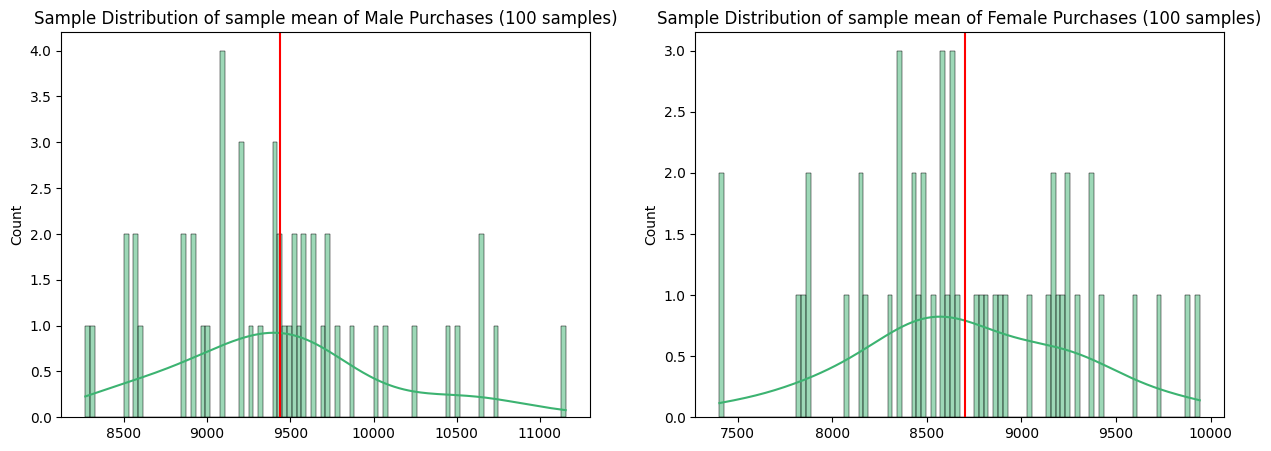

In [ ]:
fig = plt.figure(figsize=(15,5))
ax2 = fig.add_subplot(121)
sns.histplot(male_purchase_mean50,bins=100,kde=True,ax=ax2,color='mediumseagreen')
ax2.axvline(pd.Series(male_purchase_mean50).mean(),color = "red",linestyle="-",linewidth=1.5)
ax2.title.set_text("Sample Distribution of sample mean of Male Purchases (100 samples)")
ax = fig.add_subplot(122)
sns.histplot(female_purchase_mean50,bins=100,kde=True,ax=ax,color='mediumseagreen')
ax.axvline(pd.Series(female_purchase_mean50).mean(),color = "red",linestyle="-",linewidth=1.5)
ax.title.set_text("Sample Distribution of sample mean of Female Purchases (100 samples)")
plt.show()

In [ ]:
lower_limit_males50 = pd.Series(male_purchase_mean50).mean() - (pd.Series(male_purchase_mean50).std()/np.sqrt(50))*1.96
higher_limit_males50 = pd.Series(male_purchase_mean50).mean() + (pd.Series(male_purchase_mean50).std()/np.sqrt(50))*1.96
lower_limit_females50 = pd.Series(female_purchase_mean50).mean() - (pd.Series(female_purchase_mean50).std()/np.sqrt(50))*1.96
higher_limit_females50 = pd.Series(female_purchase_mean50).mean() + (pd.Series(female_purchase_mean50).std()/np.sqrt(50))*1.96

In [ ]:
lower_limit_males50,higher_limit_males50

(9255.941383462208, 9616.871416537791)

In [ ]:
(pd.Series(male_purchase_mean50).std()/np.sqrt(50))

92.07398802948572

In [ ]:
lower_limit_females50,higher_limit_females50

(8537.299643696559, 8862.554756303438)

In [ ]:
(pd.Series(female_purchase_mean50).std()/np.sqrt(50))

82.97324301195917

In [ ]:
sample_size = ["50","100","1000"]
MEN_CI95 = [f'{round(lower_limit_males50,1)} - {round(higher_limit_males50,1)}',
                        f'{round(lower_limit_males100,1)} - {round(higher_limit_males100,1)}',
                        f'{round(lower_limit_males,1)} - {round(higher_limit_males,1)}']

WOMEN_CI95 = [f'{round(lower_limit_females50,1)} - {round(higher_limit_females50,1)}',
                        f'{round(lower_limit_females100,1)} - {round(higher_limit_females100,1)}',
                        f'{round(lower_limit_females,1)} - {round(higher_limit_females,1)}']
MEN_STANDARD_ERROR = [92.7,57.4,5.31]
FEMALE_STANDARD_ERROR = [102.2,50.3,4.79]

In [ ]:
data = { "Sample Size":sample_size,
        "Male_Purchase_CI_95":MEN_CI95,
        "MALE_STANDARD_ERROR" : MEN_STANDARD_ERROR,
        "Female_Purchase_CI_95": WOMEN_CI95,
        "FEMALE_STANDARD_ERROR": FEMALE_STANDARD_ERROR}

In [ ]:
pd.DataFrame(data)

,Sample Size,Male_Purchase_CI_95,MALE_STANDARD_ERROR,Female_Purchase_CI_95,FEMALE_STANDARD_ERROR
0,50,9255.9 - 9616.9,92.70,8537.3 - 8862.6,102.20
1,100,9232.5 - 9431.5,57.40,8636.5 - 8797.4,50.30
2,1000,9421.7 - 9441.6,5.31,8724.6 - 8743.2,4.79


**Inference**:

* As the sample size increases, the standard error decreases which essentially translates to the range decreasing between which the population mean lies.

* The standard error of the mean will approach zero with the increasing number of observations in the sample, as the sample becomes more and more representative of the population, and the sample mean approaches the actual population mean.

**Conidence Interval of 99%**

In [ ]:
lower_limit_males_99 = pd.Series(male_purchase_mean).mean() - (pd.Series(male_purchase_mean).std()/np.sqrt(1000))*2.576
higher_limit_males_99 = pd.Series(male_purchase_mean).mean() + (pd.Series(male_purchase_mean).std()/np.sqrt(1000))*2.576
lower_limit_females_99 = pd.Series(female_purchase_mean).mean() - (pd.Series(female_purchase_mean).std()/np.sqrt(1000))*2.576
higher_limit_females_99 = pd.Series(female_purchase_mean).mean() + (pd.Series(female_purchase_mean).std()/np.sqrt(1000))*2.576

In [ ]:
MEN_CI = [f'{round(lower_limit_males,1)} - {round(higher_limit_males,1)}',
          f'{round(lower_limit_males_99,1)} - {round(higher_limit_males_99,1)}']
WOMEN_CI = [f'{round(lower_limit_females,1)} - {round(higher_limit_females,1)}',
          f'{round(lower_limit_females_99,1)} - {round(higher_limit_females_99,1)}']

In [ ]:
data2 = {"Confidence level": ["95%","99%"],
         "Mean_Men_Purchase":MEN_CI,
         "Mean_Women_Purchase":WOMEN_CI}

In [ ]:
pd.DataFrame(data2)

,Confidence level,Mean_Men_Purchase,Mean_Women_Purchase
0,95%,9421.7 - 9441.6,8724.6 - 8743.2
1,99%,9418.6 - 9444.8,8721.7 - 8746.2


**Inference**:

We can see that as the confidence level increases, the estimate range increases. In other words if we need a higher confidence value, we must be okay with a wider spread.

**Observation** :
* Men tend to spend more money than Women on an average.
* On an average Men spend 8% more money than women on Walmart purchases.

**Top categories on which Men and Women spend**

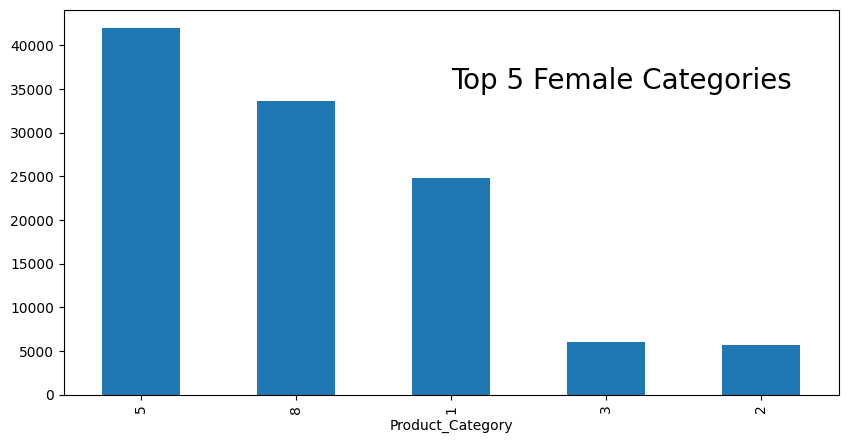

In [ ]:
figure_women = plt.figure(figsize=(10,5))
df[df['Gender'] == 'F']['Product_Category'].value_counts()[:5].plot(kind='bar')
plt.annotate("Top 5 Female Categories",xy=(2,35000),size=20)
plt.show()

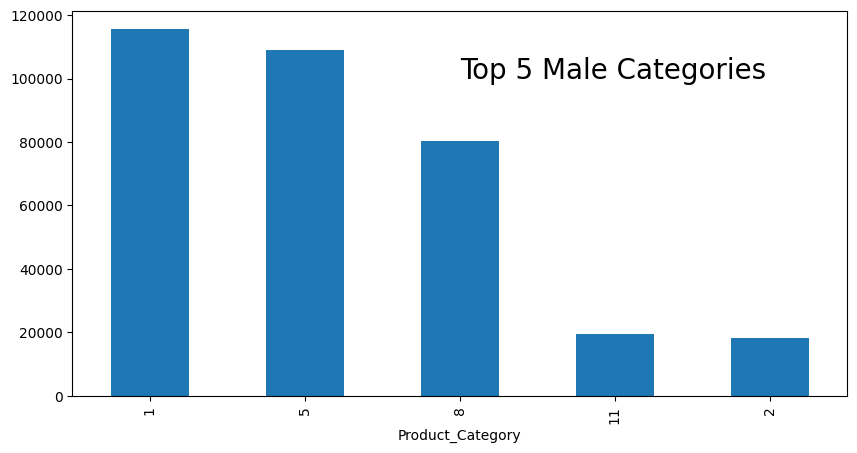

In [ ]:
figure_men = plt.figure(figsize=(10,5))
df[df['Gender'] == 'M']['Product_Category'].value_counts()[:5].plot(kind='bar')
plt.annotate("Top 5 Male Categories",xy=(2,100000),size=20)
plt.show()

**Observations** :

* We can see that categories 1,5 & 8 are the top 3 categories across both men and women with the change in order.
* Category 3 items are something which is frequently purchased by women.

**Inference** : The category 3 is phepraphs female oriented and hence attracts more women to buy it.

**Recommendations** :
Walmart should authorize a research group for more detailed analysis on category 3 and as to why it appeals the female's market over men's market. If more insights are drawn on what all falls under category 3 Walmart could incentivize Women by offering a discount on this category thus effectively trying to increase the average purchase amount by women.


**Married Vs Unmarried Average Purchase**
* Mean of the Population Derived from CLT

In [ ]:
married_purchase_mean = []
unmarried_purchase_mean = []
for i in range(1000):
  married_purchase_mean.append(df[df['Marital_Status'] == 1]['Purchase'].sample(1000).mean())
  unmarried_purchase_mean.append(df[df['Marital_Status'] == 0]['Purchase'].sample(1000).mean())

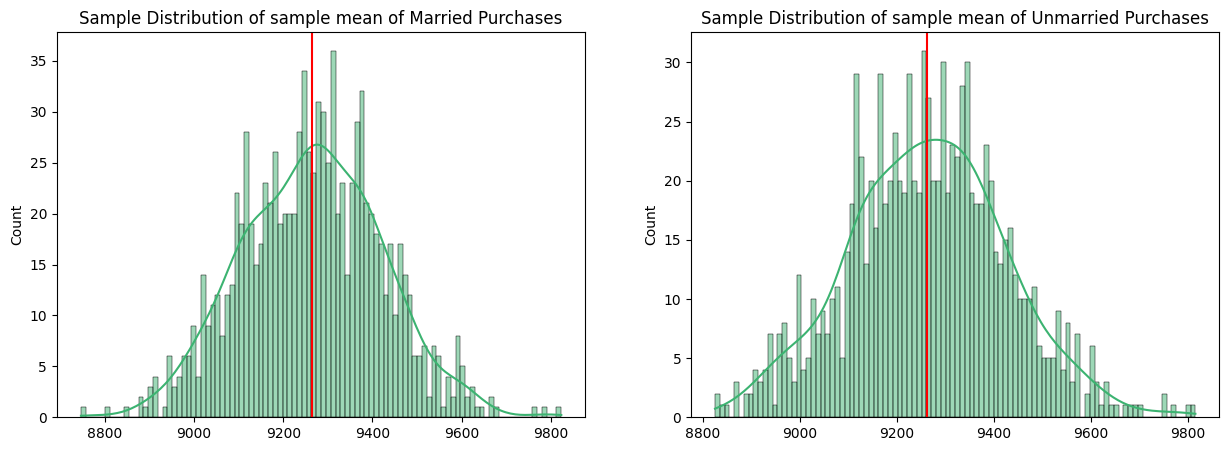

In [ ]:
fig = plt.figure(figsize=(15,5))
ax2 = fig.add_subplot(121)
sns.histplot(married_purchase_mean,bins=100,kde=True,ax=ax2,color='mediumseagreen')
ax2.axvline(pd.Series(married_purchase_mean).mean(),color = "red",linestyle="-",linewidth=1.5)
ax2.title.set_text("Sample Distribution of sample mean of Married Purchases")
ax = fig.add_subplot(122)
sns.histplot(unmarried_purchase_mean,bins=100,kde=True,ax=ax,color='mediumseagreen')
ax.axvline(pd.Series(unmarried_purchase_mean).mean(),color = "red",linestyle="-",linewidth=1.5)
ax.title.set_text("Sample Distribution of sample mean of Unmarried Purchases")
plt.show()

In [ ]:
pd.Series(married_purchase_mean).mean()

9265.403257

In [ ]:
pd.Series(unmarried_purchase_mean).mean()

9263.128581

**Mean of Sample Means**:
* The average mean of sampling distribution of sample mean for married people is 9265
* The average mean of sampling distribution of sample mean for unmarried people is 9263
* There seems to exit no difference between married & unmarried people in terms of purchasing capacity.

**Infernce**:
* Marriage does not seem to make a person change his spending habits in Walmart

In [ ]:
lower_limit_married = pd.Series(married_purchase_mean).mean() - (pd.Series(married_purchase_mean).std()/np.sqrt(1000))*1.96
higher_limit_married = pd.Series(married_purchase_mean).mean() + (pd.Series(married_purchase_mean).std()/np.sqrt(1000))*1.96
lower_limit_unmarried = pd.Series(unmarried_purchase_mean).mean() - (pd.Series(unmarried_purchase_mean).std()/np.sqrt(1000))*1.96
higher_limit_unmarried = pd.Series(unmarried_purchase_mean).mean() + (pd.Series(unmarried_purchase_mean).std()/np.sqrt(1000))*1.96

**Confidence Interval of Married people**

In [ ]:
lower_limit_married,higher_limit_married

(9255.703954982368, 9275.102559017632)

**Confidence Interval of Unmarried people**

In [ ]:
lower_limit_unmarried,higher_limit_unmarried

(9253.021708286737, 9273.235453713265)

<ipython-input-61-46d79dbd25a3>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(married_purchase_mean,shade=True,label='Married',color='deepskyblue')
<ipython-input-61-46d79dbd25a3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(unmarried_purchase_mean,shade=True,label='Unmarried',color = 'orange')


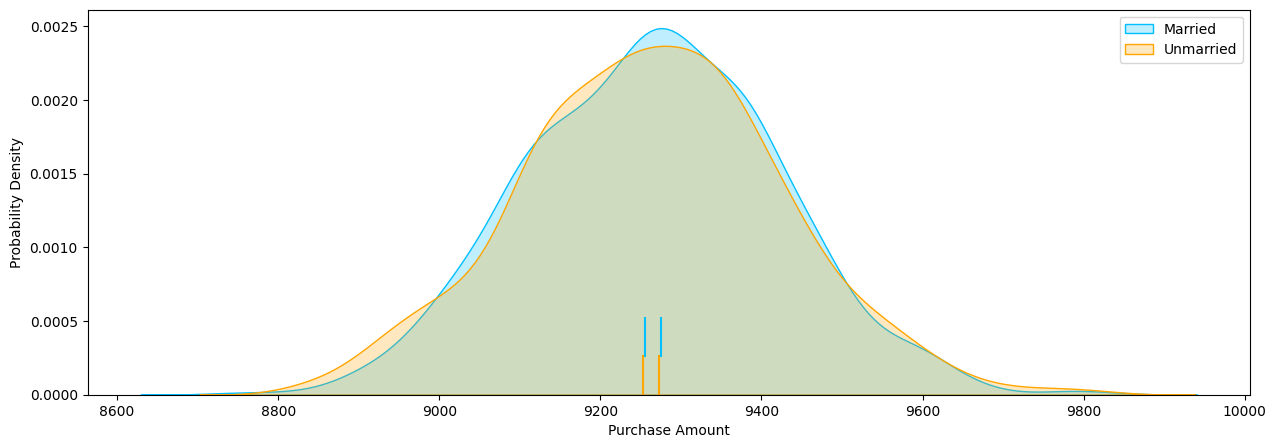

In [ ]:
fig = plt.figure(figsize=(15,5))
sns.kdeplot(married_purchase_mean,shade=True,label='Married',color='deepskyblue')
sns.kdeplot(unmarried_purchase_mean,shade=True,label='Unmarried',color = 'orange')
plt.xlabel('Purchase Amount')
plt.ylabel('Probability Density')
plt.axvline(lower_limit_married, 0.1,0.2,color='deepskyblue')
plt.axvline(higher_limit_married, 0.1,0.2,color='deepskyblue')
plt.axhline(0.00037,xmin=lower_limit_married,xmax=higher_limit_married)
plt.axvline(lower_limit_unmarried, 0,0.1,color='orange')
plt.axvline(higher_limit_unmarried, 0,0.1,color='orange')
plt.legend()
plt.show()

**Observation**:
* We can see from the above graph that the sampling distribution of sample means of married and unmarried people overlap

**Inference** :
* There is no spending behavioural change in married and unmarried people in spending habits in Walmart.

**Recommendations** :

*  Walmart could be asked not to waste resources and time trying to cater to "Married" & "Unmarried" sub categories. Rather it would be more effective and efficient to treat both categories as same.

**Age Groups Vs Average Purchase**
* Mean of the Population Derived from CLT

In [ ]:
age_dict = {}
for i in df['Age'].unique():
  x = "purchase_mean"+i
  age_dict[x] = [ df[df['Age'] == i]['Purchase'].sample(1000).mean() for a in range(1000)]

In [ ]:
def dist_plot(X,Y):
  fig = plt.figure(figsize=(8,6))
  ax2 = fig.add_subplot(111)
  sns.histplot(X,bins=100,kde=True,ax=ax2,color='mediumseagreen')
  ax2.axvline(X.mean(), color='red', linestyle='-',linewidth=1.5)
  ax2.legend(labels=['kde','mean'])
  plt.title("Age " +Y,size=10)
  plt.show()

**Distribution plot of sample mean of Purchase across Age groups**

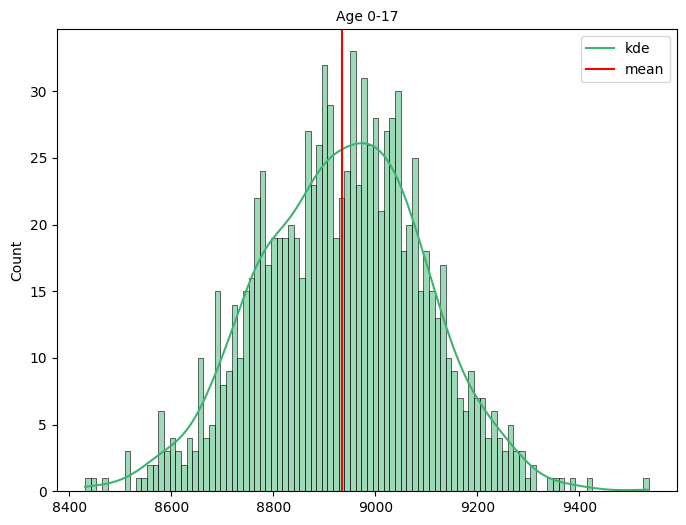

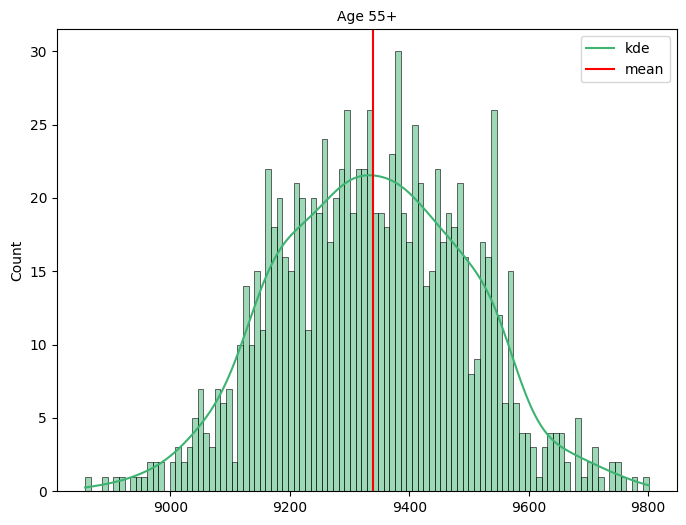

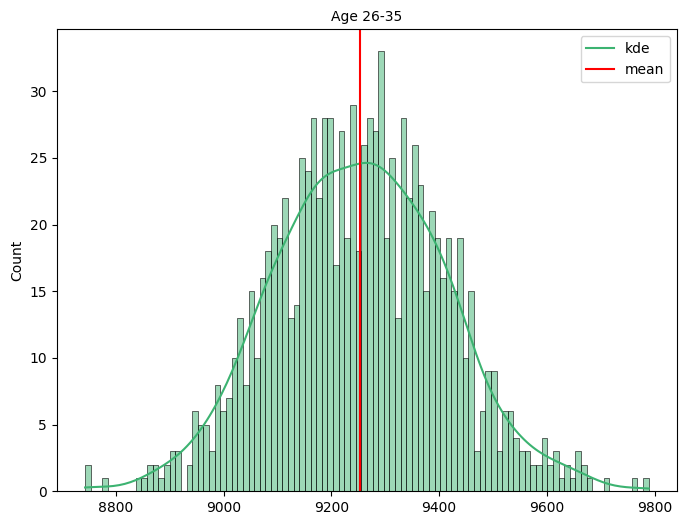

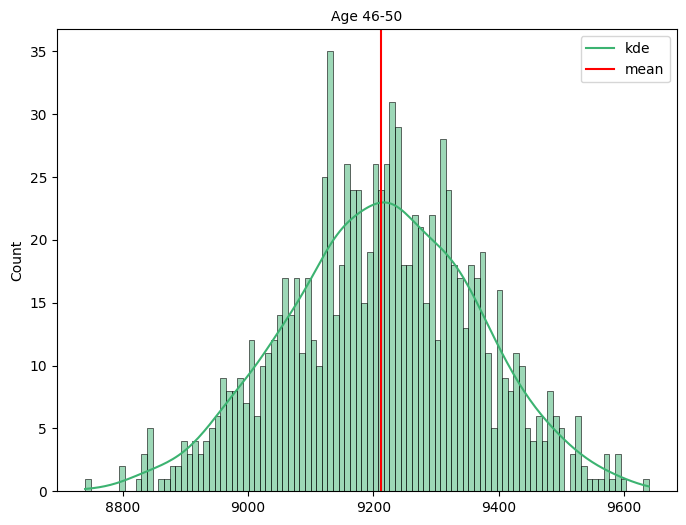

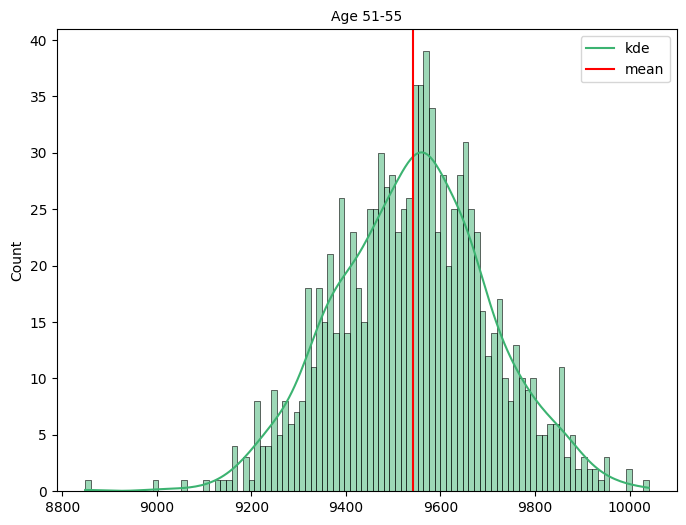

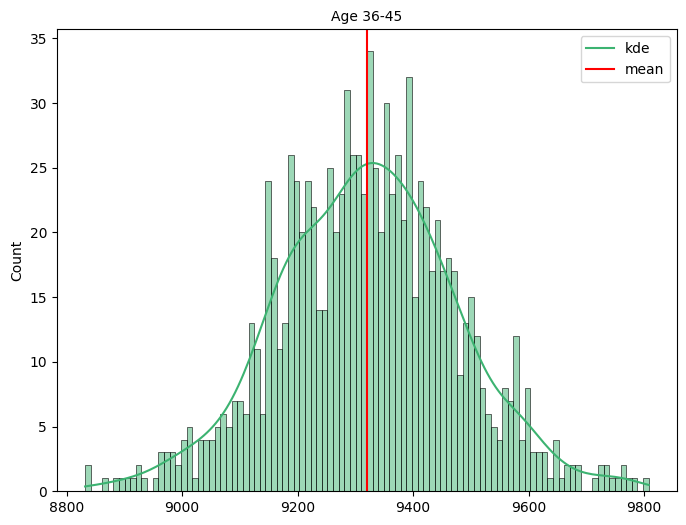

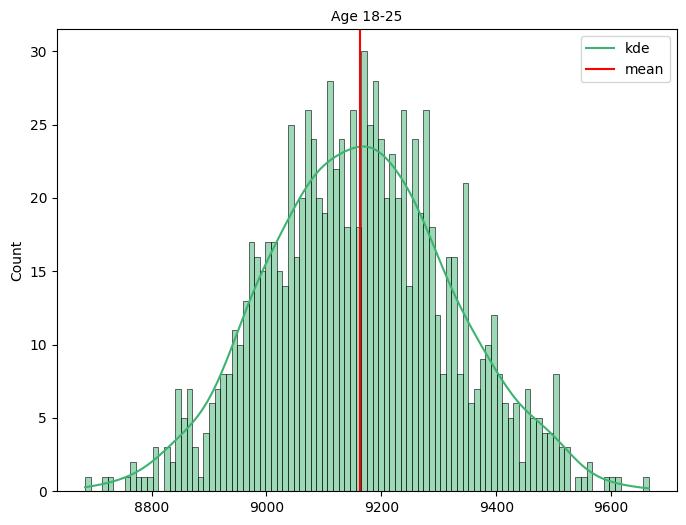

In [ ]:
for i in age_dict.keys():
  y = i.strip("purchase_mean")
  dist_plot(pd.Series(age_dict[i]),y)

In [ ]:
for i in age_dict.keys():
  print(i.strip("purchase_mean"), " : " ,round(pd.Series(age_dict[i]).mean(),1))

0-17  :  8934.5
55+  :  9339.3
26-35  :  9252.4
46-50  :  9212.7
51-55  :  9541.7
36-45  :  9320.7
18-25  :  9163.0


**Observation**:

The mean of sample means for age groups is as follows:

* 0-17  : 8934.5
* 18-25 : 9339.3
* 26-35 : 9252.4
* 36-45 : 9212.7
* 46-50 : 9541.7
* 51-55 : 9320.7
* 55+   : 9163.0

**Inference** :

The lowest sample mean is for 0-17 age group and the highest is for 51-55 age group

**Finding Confidence levels**

In [ ]:
lower_limit_males_99 = pd.Series(male_purchase_mean).mean() - (pd.Series(male_purchase_mean).std()/np.sqrt(1000))*2.576
higher_limit_males_99 = pd.Series(male_purchase_mean).mean() + (pd.Series(male_purchase_mean).std()/np.sqrt(1000))*2.576

In [ ]:
Lower = {}
Upper = {}
for i in age_dict.keys():
  x = i.strip('purchase_mean')
  x1 = "lower_limit_"+x
  x2 = "upper_limit"+x
  y = round(pd.Series(age_dict[i]).mean() - (pd.Series(age_dict[i]).std()/np.sqrt(1000))*1.96,1)
  z = round(pd.Series(age_dict[i]).mean() + (pd.Series(age_dict[i]).std()/np.sqrt(1000))*1.96,1)
  Lower[x1] = y
  Upper[x2] = z

In [ ]:
age_group  = ['0-17','18-25','26-35','36-45','46-50','51-55','55+']

In [ ]:
age_ci = {"age_group":age_group,"Lower_Limit":list(Lower.values()),"Upper_Limit":list(Upper.values())}

**Confidence Interval of average Purchase across age groups with 95% confidence**

In [ ]:
pd.DataFrame(age_ci)

,age_group,Lower_Limit,Upper_Limit
0,0-17,8924.6,8944.5
1,18-25,9329.5,9349.1
2,26-35,9242.6,9262.2
3,36-45,9203.3,9222.1
4,46-50,9531.7,9551.8
5,51-55,9311.0,9330.3
6,55+,9153.1,9172.9


The above tabular column gives us the confidence levels of average mean purchase values across different age bins.

<ipython-input-73-1ca021631f73>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_dict[i],shade=True,label = x)
<ipython-input-73-1ca021631f73>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_dict[i],shade=True,label = x)
<ipython-input-73-1ca021631f73>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_dict[i],shade=True,label = x)
<ipython-input-73-1ca021631f73>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_dict[i],shade=True,label = x)
<ipython-input-73-1ca021631f73>:4: FutureWar

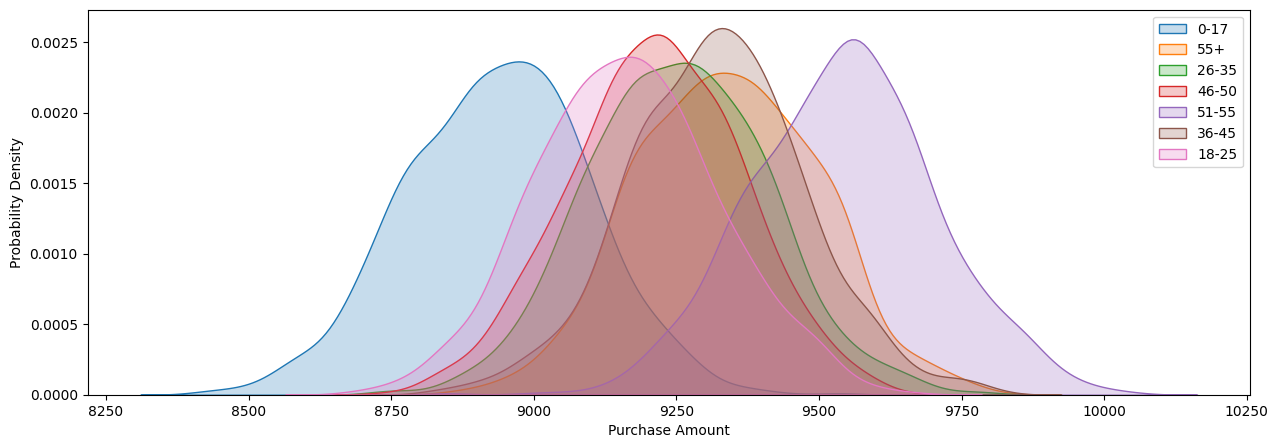

In [ ]:
fig = plt.figure(figsize=(15,5))
for i in age_dict.keys():
  x = i.strip('purchase_mean')
  sns.kdeplot(age_dict[i],shade=True,label = x)
plt.legend()
plt.xlabel('Purchase Amount')
plt.ylabel('Probability Density')
plt.show()


We can see that most of the age group's purchases overlap except for (0-17) & (51-55)

**Top categories across different cities**

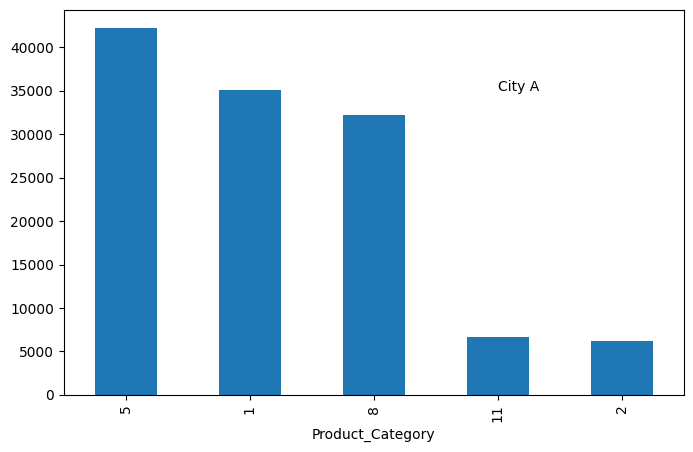

In [ ]:
figure_city = plt.figure(figsize=(8,5))
df[df['City_Category'] == 'A']['Product_Category'].value_counts()[:5].plot(kind='bar')
plt.annotate("City A",xy=(3,35000),size=10)
plt.show()

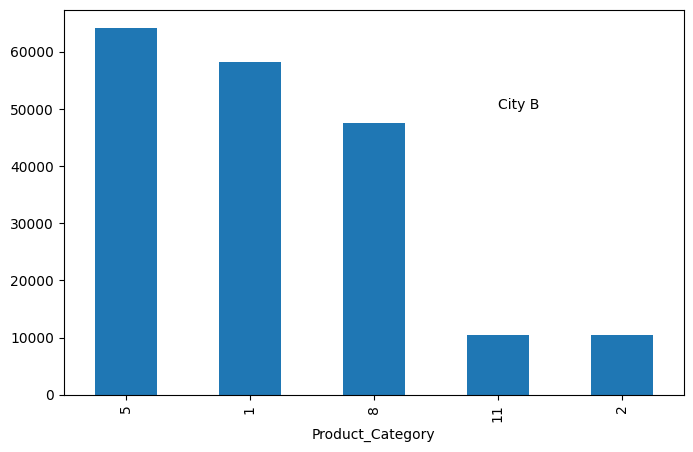

In [ ]:
figure_city = plt.figure(figsize=(8,5))
df[df['City_Category'] == 'B']['Product_Category'].value_counts()[:5].plot(kind='bar')
plt.annotate("City B",xy=(3,50000),size=10)
plt.show()

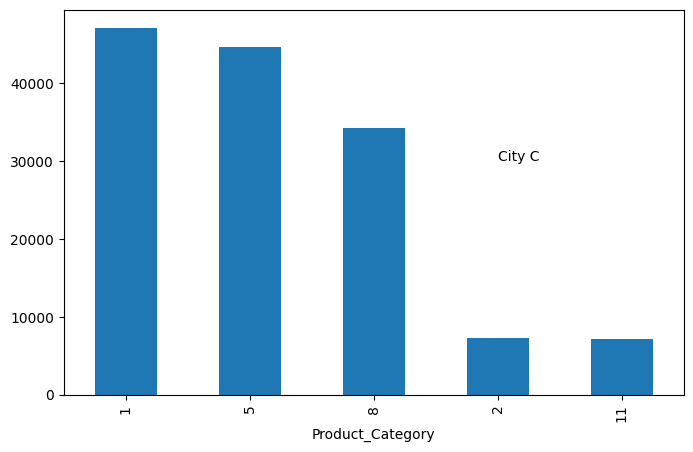

In [ ]:
figure_city = plt.figure(figsize=(8,5))
df[df['City_Category'] == 'C']['Product_Category'].value_counts()[:5].plot(kind='bar')
plt.annotate("City C",xy=(3,30000),size=10)
plt.show()

In [ ]:
df[df['Product_Category']==1]['Purchase'].mean()

13606.218595506418

In [ ]:
df[df['Product_Category']==5]['Purchase'].mean()

6240.088178198273

**Observation**:
* In cities A & B, Category 5 is the most consumed category of products. In city C however, the Category 1 is the most consumed.
* Upon checking the average purchase amount of category 1, it was seen that category 1 outperforms category 5 by a factor of 2.
* We had also earlier seen that the average purchase amount spent by city C was greater than city A & B.

**Inference** :
* City C is an affluent city as the average spending is greater than other two cities and the most frequently bought items belong to category 1 whose average value is more than category 5.
* One of the main reasons why city C's average spend is more is because of the affinity towards category 1 items which are generally pricey.

**Recommendations**:

* One way city A & B could increase their average purchase amount would be to show more interest in category 1 items
* Walmart could start advertizing more category 1 items to essentially push more of these products on its website.
* Walmart could also put up hoardings of top moving category 1 items in and around its brick and mortar store so as to subliminally change the customers affinity towards the category.
* This would essentially pave way for increase in average spend overtime.




**Top categories across different age groups**

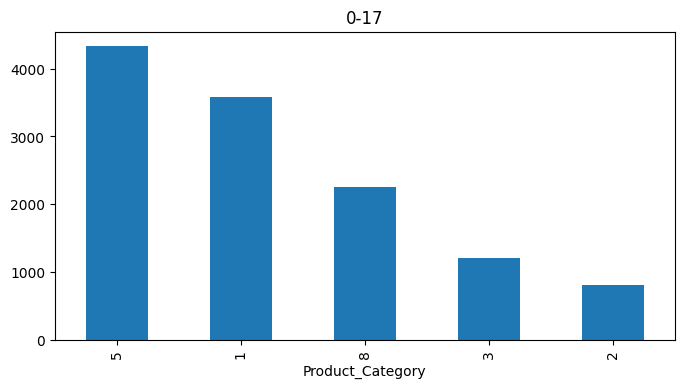

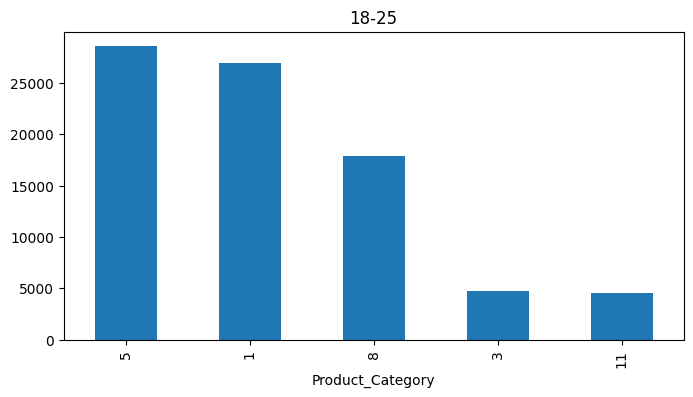

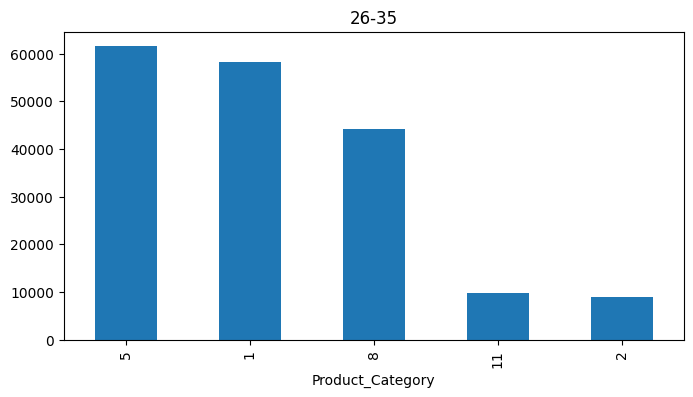

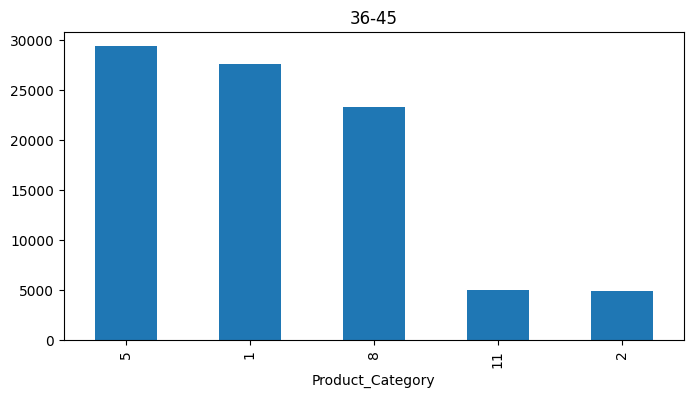

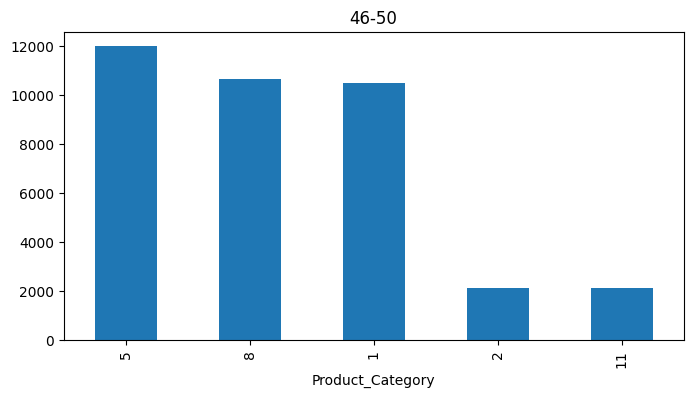

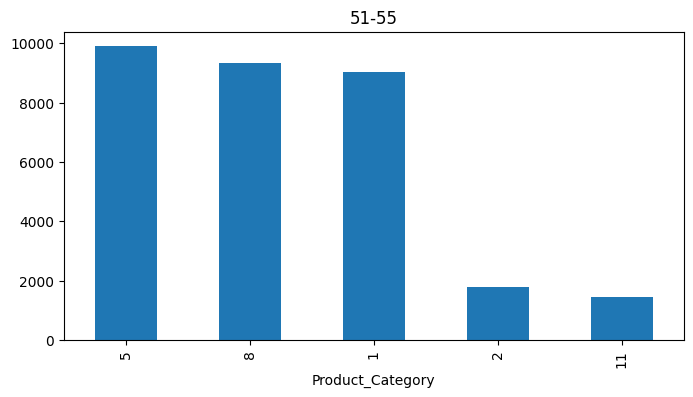

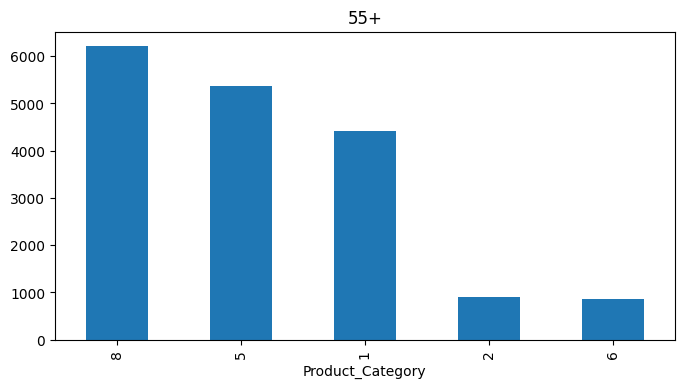

In [ ]:
for i in age_group:
  plt.figure(figsize=(8,4))
  df[df['Age'] == i]['Product_Category'].value_counts()[:5].plot(kind='bar')
  plt.title(i)
  plt.show()

**Observations** :
* Category 3 appeals to age group '0-17' & '18-25'. That is it appeals to anyone under the age of 25
* Category 6 appeals to age group above 55.

**Recommendations**:
* Walmart should advertize products on their websites according to the age group.
* For example category 3 should be advertized to age group less than 25 and category 6 should be advertized to people over 55

**Recommendation Recap**

* Walmart should authorize a research group for more detailed analysis on category 3 and as to why it appeals the female's market over men's market. If more insights are drawn on what all falls under category 3 Walmart could incentivize Women by offering a discount on this category thus effectively trying to increase the average purchase amount by women.

* Walmart could be asked not to waste resources and time trying to cater to "Married" & "Unmarried" sub categories. Rather it would be more effective and efficient to treat both categories as same.

* Walmart could start advertizing more category 1 items to essentially push more of these products on its website and brick and mortar locations.

* Walmart should advertize products on their websites according to the age group.

